In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
df = pd.read_csv("C:/Users/1/Desktop/telco_churn_data.csv")

ModuleNotFoundError: No module named 'pandas'

In [2]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


B: Numerical values:  Tenure in Months/Avg Monthly Long Distance Charges/Avg Monthly GB Download/Monthly Charge/Total Regular Charges/Total Refunds/Age/Total Long Distance Charges/Total Customer Svc Requests/Population 
Categorical values： Others

In [3]:
df.value_counts("Churn Value")

Churn Value
0    5174
1    1869
dtype: int64

C: There are two different outcome classes which are 0 and 1. 0 has 5174 and 1 has 1869.

In [4]:
df = df.drop(['City','Zip Code','Population','Latitude','Longitude','Internet Type','Customer ID','Churn Category','Churn Reason'], axis=1)

D: Variables "Latitude" and "Longitude" are location-realated.
E. a.Because it does not have any predictive power. In other words, there is no pattern or relationship that can be learned from a variable with unique values.
F: The churn category and churn reason are typically only available after a customer has already churned. Therefore, they cannot be used as inputs to predict churn in advance.

In [5]:
miss_values = df.isna().sum()
miss_values[miss_values > len(df)/2]

Customer Satisfaction    5209
dtype: int64

In [6]:
df = df.drop("Customer Satisfaction", axis=1)

G: It may lead to bias and overconfidence. The substitution of missing values can introduce bias into the data set because the substituted values may not represent the true values of the missing ones. Estimation of missing values can give a false sense of confidence because the estimated values may not be accurate.

In [7]:
df.corr()


,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
Number of Referrals,1.000000,0.326975,0.006336,0.024131,0.016020,0.250378,0.024756,0.086958,0.216190,-0.025141,0.278003,-0.286540,0.122843,-0.140121,-0.112472
Tenure in Months,0.326975,1.000000,0.014596,0.031410,0.231389,0.826074,0.059021,0.330911,0.674149,0.009927,0.108237,-0.352861,0.396292,-0.200989,-0.155561
Avg Monthly Long Distance Charges,0.006336,0.014596,1.000000,-0.029658,0.138439,0.069500,-0.018644,0.028602,0.599828,-0.011749,-0.007324,0.008120,0.023858,0.016678,-0.001392
Avg Monthly GB Download,0.024131,0.031410,-0.029658,1.000000,0.392364,0.208882,0.001431,0.404215,0.000372,-0.373632,0.117269,0.094932,0.016595,0.064806,0.048205
Monthly Charge,0.016020,0.231389,0.138439,0.392364,1.000000,0.636000,0.032154,0.319583,0.235441,0.148281,-0.139753,0.232339,0.092075,0.119970,0.103774
Total Regular Charges,0.250378,0.826074,0.069500,0.208882,0.636000,1.000000,0.039558,0.441563,0.610185,0.059684,0.022535,-0.198546,0.341947,-0.118745,-0.087749
Total Refunds,0.024756,0.059021,-0.018644,0.001431,0.032154,0.039558,1.000000,0.024248,0.028113,0.024168,0.014023,-0.033709,0.007992,-0.010620,-0.012822
Total Extra Data Charges,0.086958,0.330911,0.028602,0.404215,0.319583,0.441563,0.024248,1.000000,0.244896,-0.140663,0.077710,0.006227,0.127702,0.014048,-0.000883
Total Long Distance Charges,0.216190,0.674149,0.599828,0.000372,0.235441,0.610185,0.028113,0.244896,1.000000,0.003065,0.068966,-0.223756,0.282189,-0.120352,-0.097072
Age,-0.025141,0.009927,-0.011749,-0.373632,0.148281,0.059684,0.024168,-0.140663,0.003065,1.000000,-0.119000,0.115760,-0.001826,0.063407,0.042983


In [8]:
df2 = df.drop('Tenure in Months', axis=1)
df2.corr()

,Number of Referrals,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
Number of Referrals,1.000000,0.006336,0.024131,0.016020,0.250378,0.024756,0.086958,0.216190,-0.025141,0.278003,-0.286540,0.122843,-0.140121,-0.112472
Avg Monthly Long Distance Charges,0.006336,1.000000,-0.029658,0.138439,0.069500,-0.018644,0.028602,0.599828,-0.011749,-0.007324,0.008120,0.023858,0.016678,-0.001392
Avg Monthly GB Download,0.024131,-0.029658,1.000000,0.392364,0.208882,0.001431,0.404215,0.000372,-0.373632,0.117269,0.094932,0.016595,0.064806,0.048205
Monthly Charge,0.016020,0.138439,0.392364,1.000000,0.636000,0.032154,0.319583,0.235441,0.148281,-0.139753,0.232339,0.092075,0.119970,0.103774
Total Regular Charges,0.250378,0.069500,0.208882,0.636000,1.000000,0.039558,0.441563,0.610185,0.059684,0.022535,-0.198546,0.341947,-0.118745,-0.087749
Total Refunds,0.024756,-0.018644,0.001431,0.032154,0.039558,1.000000,0.024248,0.028113,0.024168,0.014023,-0.033709,0.007992,-0.010620,-0.012822
Total Extra Data Charges,0.086958,0.028602,0.404215,0.319583,0.441563,0.024248,1.000000,0.244896,-0.140663,0.077710,0.006227,0.127702,0.014048,-0.000883
Total Long Distance Charges,0.216190,0.599828,0.000372,0.235441,0.610185,0.028113,0.244896,1.000000,0.003065,0.068966,-0.223756,0.282189,-0.120352,-0.097072
Age,-0.025141,-0.011749,-0.373632,0.148281,0.059684,0.024168,-0.140663,0.003065,1.000000,-0.119000,0.115760,-0.001826,0.063407,0.042983
Number of Dependents,0.278003,-0.007324,0.117269,-0.139753,0.022535,0.014023,0.077710,0.068966,-0.119000,1.000000,-0.218780,0.049611,-0.101282,-0.080386


In [70]:
df3 = pd.get_dummies(df2, drop_first = True, 
                       columns = ['Referred a Friend','Offer','Phone Service','Multiple Lines','Internet Service', 'Online Security',
                                  'Online Backup','Device Protection Plan','Premium Tech Support', 'Streaming TV','Streaming Movies',
                                  'Streaming Music','Unlimited Data','Contract', 'Paperless Billing','Payment Method','Gender',
                                  'Under 30','Senior Citizen','Married','Dependents'])
df3.columns

Index(['Number of Referrals', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Age', 'Number of Dependents',
       'Churn Value', 'CLTV', 'Total Customer Svc Requests',
       'Product/Service Issues Reported', 'Referred a Friend_Yes',
       'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D',
       'Offer_Offer E', 'Phone Service_Yes', 'Multiple Lines_Yes',
       'Internet Service_Yes', 'Online Security_Yes', 'Online Backup_Yes',
       'Device Protection Plan_Yes', 'Premium Tech Support_Yes',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes',
       'Unlimited Data_Yes', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing_Yes', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check', 'Gender_Male', 'Under 30_Yes',
       'Senior Citizen_Yes', 'Married_Yes', 'Depe

I. Variables that are filled with non-numeric content need to be dummified, but no variables need to be further handed.

In [71]:
X = df3[['Number of Referrals', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Age', 'Number of Dependents',
       'Churn Value', 'CLTV', 'Total Customer Svc Requests',
       'Product/Service Issues Reported', 'Referred a Friend_Yes',
       'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D',
       'Offer_Offer E', 'Phone Service_Yes', 'Multiple Lines_Yes',
       'Internet Service_Yes', 'Online Security_Yes', 'Online Backup_Yes',
       'Device Protection Plan_Yes', 'Premium Tech Support_Yes',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes',
       'Unlimited Data_Yes', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing_Yes', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check', 'Gender_Male', 'Under 30_Yes',
       'Senior Citizen_Yes', 'Married_Yes', 'Dependents_Yes']]
y = df3['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=9922)

J. My birthday is Feb. 2, 1999, so I choose 9922 as the seed value.

In [72]:
means_churn = df3.groupby('Churn Value').mean()
means_churn

,Number of Referrals,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,...,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Gender_Male,Under 30_Yes,Senior Citizen_Yes,Married_Yes,Dependents_Yes
Churn Value,,,,,,,,,,,,,,,,,,,,,
0,2.468690,22.883572,19.915733,61.265124,2550.792103,2.122279,275.935481,862.952107,45.344414,0.595284,...,0.267491,0.354658,0.535562,0.454387,0.046966,0.507344,0.212022,0.128721,0.528218,0.293970
1,0.521134,23.167635,24.419476,77.369727,1531.796094,1.518983,285.596501,433.917549,49.735688,0.118245,...,0.088818,0.025682,0.749064,0.212948,0.075976,0.497592,0.162654,0.254682,0.357945,0.056715


K. The variables of 'Number of Referrals'， 'Total Long Distance Charges'and 'Total Regular Charges' were strongly impactful, because the data differed greatly after classification.

#Iteration 1

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model='ranking ~ C(brand,Sum)+C(price,Sum)+C(weight,Sum)+C(crust,Sum)+C(cheese,Sum)+C(size,Sum)+C(toppings,Sum)+C(spicy,Sum)'
model_fit=smf.ols(model,data=df).fit()
print(model_fit.summary())

lr_model = sm.Logit(y,sm.add_constant(X))
result = lr_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.281927
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Churn Value   No. Observations:                 4225
Model:                          Logit   Df Residuals:                     4187
Method:                           MLE   Df Model:                           37
Date:                Sun, 26 Mar 2023   Pseudo R-squ.:                  0.5092
Time:                        23:41:35   Log-Likelihood:                -1191.1
converged:                       True   LL-Null:                       -2426.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.4389      0.450     -3.199      0.001      -2.321      -0.557
Number of Referrals                  -0.5710      0.052    -10.992      0.000      -0.673      -0.469
Avg Monthly Long Distance Charges    -0.0018      0.004     -0.476      0.634      -0.009       0.006
Avg Monthly GB Download               0.0169      0.004      3.841      0.000       0.008       0.026
Monthly Charge                        0.0600      0.006     10.081      0.000       0.048       0.072
Total Refunds                        -0.0049      0.007     -0.688      0.492      -0.019       0.009
Total Extra Data Charges             -0.0002      0.000     -1.469      0.142      -0.000    5.22e-05
Age                                   0.0120      0.006      1.909      0.056      -0.000       0.024
Number of Dependents                  0.0076      0.146      0.052      0.958      -0.279       0.294
CLTV                              -1.593e-05   4.59e-05     -0.347      0.729      -0.000     7.4e-05
Product/Service Issues Reported       1.2407      0.087     14.337      0.000       1.071       1.410
Referred a Friend_Yes                 1.1185      0.342      3.272      0.001       0.449       1.789
Offer_Offer A                         0.4840      0.329      1.471      0.141      -0.161       1.129
Offer_Offer B                        -0.2971      0.208     -1.425      0.154      -0.706       0.111
Offer_Offer C                        -0.4383      0.227     -1.927      0.054      -0.884       0.007
Offer_Offer D                        -0.2578      0.188     -1.373      0.170      -0.626       0.110
Offer_Offer E                         0.6481      0.149      4.360      0.000       0.357       0.939
Phone Service_Yes                    -1.8998      0.307     -6.187      0.000      -2.502      -1.298
Multiple Lines_Yes                   -0.3452      0.133     -2.589      0.010      -0.606      -0.084
Internet Service_Yes                 -1.2059      0.331     -3.646      0.000      -1.854      -0.558
Online Security_Yes                  -0.5227      0.136     -3.834      0.000      -0.790      -0.255
Online Backup_Yes                    -0.6244      0.129     -4.837      0.000      -0.877      -0.371
Device Protection Plan_Yes           -0.3874      0.133     -2.923      0.003      -0.647      -0.128
Premium Tech Support_Yes             -0.3851      0.137     -2.814      0.005      -0.653      -0.117
Streaming TV_Yes                     -0.4682      0.148     -3.171      0.002      -0.758      -0.179
Streaming Movies_Yes                 -0.7769      0.234     -3.315      0.001      -1.236      -0.318
Streaming Music_Yes                   0.5457      0.225      2.430      0.015       0.106       0.986
Unlimited Data_Yes                   -1.3683      0.129    -10.575      0.000      -1.622      -1.115
Contract_One Year                    -1.6661      0.165    -10.128      0.000  

M.a. Numeric variables with high p_values: 'Avg Monthly Long Distance Charges', 'Total Refunds', 'Total Extra Data Charges', 'Number of Dependents', 'CLTV', 'Age'

M.b. Categorical variables: 'Paperless Billing_Yes', 'Payment Method_Credit Card', 'Gender_Male','Married_Yes'

#Iteration 2

In [73]:
X2_train = X_train[[ 'Number of Referrals', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Regular Charges', 'Total Long Distance Charges', 'Total Customer Svc Requests', 
                    'Product/Service Issues Reported', 'Referred a Friend_Yes', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 
                    'Phone Service_Yes','Multiple Lines_Yes', 'Internet Service_Yes', 'Online Security_Yes', 'Online Backup_Yes', 
                    'Device Protection Plan_Yes', 'Premium Tech Support_Yes', 'Streaming TV_Yes', 'Streaming Movies_Yes', 
                    'Streaming Music_Yes', 'Unlimited Data_Yes', 'Contract_One Year', 'Contract_Two Year', 'Payment Method_Mailed Check', 
                    'Under 30_Yes', 'Senior Citizen_Yes', 'Dependents_Yes']]

In [74]:
X2_test = X_test[[ 'Number of Referrals', 'Avg Monthly GB Download', 'Monthly Charge',  'Total Regular Charges', 'Total Long Distance Charges', 
                  'Total Customer Svc Requests', 'Product/Service Issues Reported', 
                    'Referred a Friend_Yes', 'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 
                    'Phone Service_Yes','Multiple Lines_Yes', 'Internet Service_Yes', 'Online Security_Yes', 'Online Backup_Yes', 
                    'Device Protection Plan_Yes', 'Premium Tech Support_Yes', 'Streaming TV_Yes', 'Streaming Movies_Yes', 
                    'Streaming Music_Yes', 'Unlimited Data_Yes', 'Contract_One Year', 'Contract_Two Year', 'Payment Method_Mailed Check', 
                    'Under 30_Yes', 'Senior Citizen_Yes', 'Dependents_Yes']]

In [75]:
lr2_model = sm.Logit(y_train,sm.add_constant(X2_train))
result2 = lr2_model.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.227025
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            Churn Value   No. Observations:                 4225
Model:                          Logit   Df Residuals:                     4194
Method:                           MLE   Df Model:                           30
Date:                Mon, 27 Mar 2023   Pseudo R-squ.:                  0.6048
Time:                        00:58:32   Log-Likelihood:                -959.18
converged:                       True   LL-Null:                       -2426.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -2.2945      0.312     -7.343  

In [76]:
logmodel = LogisticRegression()
logmodel.fit(X2_train,y_train)
#LogisticRegression()

C:\Users\1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

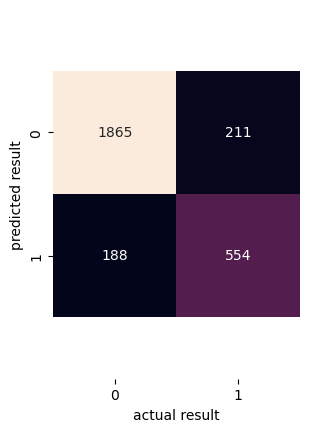

In [77]:
prediction1 = logmodel.predict(X2_train)
prediction2 = logmodel.predict(X2_test)
mat = confusion_matrix(prediction1,y_train)
mat2 = confusion_matrix(prediction2,y_test)
sns.heatmap(mat2,square=True,fmt='g',annot=True,cbar=False)
plt.xlabel('actual result')
plt.ylabel('predicted result')
a,b = plt.ylim()
a+=0.5
b-=0.5
plt.ylim(a, b)
plt.show()

In [78]:
total_matrix =sum(sum(mat2))
accuracy = (mat2[1,1]+mat2[0,0])/total_matrix
print('The model has an accuracy of',accuracy )

sensitivity = mat2[1,1]/(mat2[1,1]+mat2[0,1])
print('The model has a sensitivity of', sensitivity)

specificity = mat2[0,0]/(mat2[0,0]+mat2[1,0])
print('The model has a specificity of',specificity)

precision = mat2[1,1]/ (mat2[1,1]+mat2[1,0])
print('The model has a precision of', precision)

bala_accuracy = (sensitivity+specificity)/2
print('The model has a balanced accuracy of',bala_accuracy)

The model has an accuracy of 0.8584102200141944
The model has a sensitivity of 0.7241830065359477
The model has a specificity of 0.9084266926449099
The model has a precision of 0.7466307277628033
The model has a balanced accuracy of 0.8163048495904288


In [79]:
total_matrix1 =sum(sum(mat))
accuracy1 = (mat[1,1]+mat[0,0])/total_matrix1
accuracy1

0.8570414201183432

Q. The purpose is to compare the accuracy of the two datasets, and the comparison shows that the model has high accuracy in both the training and test sets, which means it can be fit well.

In [80]:
X2_train.describe()

,Number of Referrals,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Long Distance Charges,Total Customer Svc Requests,Product/Service Issues Reported,Referred a Friend_Yes,Offer_Offer A,Offer_Offer B,...,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Payment Method_Mailed Check,Under 30_Yes,Senior Citizen_Yes,Dependents_Yes
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,1.972781,21.548402,65.574239,2292.368036,758.362568,1.347219,0.312426,0.457751,0.072663,0.120,...,0.380355,0.386982,0.356450,0.384379,0.225799,0.261065,0.054201,0.204970,0.159763,0.234793
std,3.030303,21.278770,30.593499,2283.041081,850.585221,1.433470,0.716684,0.498271,0.259613,0.325,...,0.485532,0.487117,0.479007,0.486506,0.418157,0.439267,0.226441,0.403728,0.366430,0.423919
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,35.800000,398.550000,71.550000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,18.000000,72.332000,1404.650000,413.700000,1.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,29.000000,90.600000,3827.900000,1220.180000,2.000000,0.000000,1.000000,0.000000,0.000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,94.000000,120.276000,8672.450000,3564.000000,9.000000,6.000000,1.000000,1.000000,1.000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
input1 = pd.DataFrame([{'Number of Referrals':1, 
       'Avg Monthly GB Download':22, 'Monthly Charge':66, 
       'Total Regular Charges':2300, 'Total Long Distance Charges':800, 
       'Total Customer Svc Requests':2, 
       'Product/Service Issues Reported':0.5,
       'Referred a Friend_Yes':1, 'Offer_Offer A':0, 'Offer_Offer B':0,
       'Offer_Offer C':1, 'Offer_Offer D':0, 'Offer_Offer E':0, 'Phone Service_Yes':0,
       'Multiple Lines_Yes':1, 'Internet Service_Yes':0, 'Online Security_Yes':0,
       'Online Backup_Yes':1, 'Device Protection Plan_Yes':0,
       'Premium Tech Support_Yes':0, 'Streaming TV_Yes':1, 'Streaming Movies_Yes':0,
       'Streaming Music_Yes':1, 'Unlimited Data_Yes':0, 'Contract_One Year':0,
       'Contract_Two Year':0, 'Payment Method_Mailed Check':0, 'Under 30_Yes':0,
        'Senior Citizen_Yes':1, 'Dependents_Yes':0}])
logmodel.predict(input1)

array([1], dtype=int64)

R.a. I predict that the customer will left the company this quarter.

In [109]:
logmodel.predict_proba(input1)

array([[0.21971501, 0.78028499]])

S: Because the logistic regression model assumes that the relationship between the input variables and the output variable is a linear one, and it models this relationship based on the range of values in the training dataset. If values outside the range of the training dataset are used to make predictions, then the model may not be able to accurately predict the outcome.

In [86]:
input2 = pd.DataFrame([{'Number of Referrals':10, 
       'Avg Monthly GB Download':70, 'Monthly Charge':100, 
       'Total Regular Charges':10000, 'Total Long Distance Charges':4000, 
       'Total Customer Svc Requests':10, 
       'Product/Service Issues Reported':1.5,
       'Referred a Friend_Yes':1, 'Offer_Offer A':0, 'Offer_Offer B':0,
       'Offer_Offer C':1, 'Offer_Offer D':0, 'Offer_Offer E':0, 'Phone Service_Yes':0,
       'Multiple Lines_Yes':1, 'Internet Service_Yes':0, 'Online Security_Yes':0,
       'Online Backup_Yes':1, 'Device Protection Plan_Yes':0,
       'Premium Tech Support_Yes':0, 'Streaming TV_Yes':1, 'Streaming Movies_Yes':0,
       'Streaming Music_Yes':1, 'Unlimited Data_Yes':0, 'Contract_One Year':0,
       'Contract_Two Year':0, 'Payment Method_Mailed Check':0, 'Under 30_Yes':0,
        'Senior Citizen_Yes':1, 'Dependents_Yes':0}])
logmodel.predict(input2)

array([1], dtype=int64)

S. The model results are negative, and the customer will left the company, but since the data is unknown, the results are derived from the known data, not necessarily the facts.

#Part Ⅱ

In [87]:
ds = pd.read_csv("C:/Users/1/Desktop/telco_churn_data.csv")

In [88]:
ds2 = ds.drop(['City','Zip Code','Population','Latitude','Longitude','Internet Type','Customer ID','Churn Category','Churn Reason',
         'Customer Satisfaction','Tenure in Months','Avg Monthly Long Distance Charges', 'Total Refunds', 'Total Extra Data Charges', 
         'Number of Dependents', 'CLTV', 'Age','Paperless Billing', 'Payment Method', 'Gender','Married'],axis=1)

In [110]:
ds3 = pd.get_dummies(ds2, drop_first = False,
                     columns = [ 'Referred a Friend', 'Offer','Phone Service','Multiple Lines', 'Internet Service', 'Online Security', 
                                'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 
                                'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 
                                'Under 30', 'Senior Citizen', 'Dependents'])
ds3.columns

Index(['Number of Referrals', 'Avg Monthly GB Download', 'Monthly Charge',
       'Total Regular Charges', 'Total Long Distance Charges', 'Churn Value',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Referred a Friend_No', 'Referred a Friend_Yes', 'Offer_None',
       'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D',
       'Offer_Offer E', 'Phone Service_No', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_Yes', 'Internet Service_No',
       'Internet Service_Yes', 'Online Security_No', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_Yes', 'Device Protection Plan_No',
       'Device Protection Plan_Yes', 'Premium Tech Support_No',
       'Premium Tech Support_Yes', 'Streaming TV_No', 'Streaming TV_Yes',
       'Streaming Movies_No', 'Streaming Movies_Yes', 'Streaming Music_No',
       'Streaming Music_Yes', 'Unlimited Data_No', 'Unlimited Data_Yes',
       'Contract_Month-to-Month', 'Contract_One Yea

In [113]:
X = ds3[[ 'Number of Referrals', 'Avg Monthly GB Download', 'Monthly Charge',
       'Total Regular Charges', 'Total Long Distance Charges',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Referred a Friend_No', 'Referred a Friend_Yes', 'Offer_None',
       'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D',
       'Offer_Offer E', 'Phone Service_No', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_Yes', 'Internet Service_No',
       'Internet Service_Yes', 'Online Security_No', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_Yes', 'Device Protection Plan_No',
       'Device Protection Plan_Yes', 'Premium Tech Support_No',
       'Premium Tech Support_Yes', 'Streaming TV_No', 'Streaming TV_Yes',
       'Streaming Movies_No', 'Streaming Movies_Yes', 'Streaming Music_No',
       'Streaming Music_Yes', 'Unlimited Data_No', 'Unlimited Data_Yes',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Under 30_No', 'Under 30_Yes', 'Senior Citizen_No',
       'Senior Citizen_Yes', 'Dependents_No', 'Dependents_Yes']]
y = ds3['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=9922)

In [114]:
clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [2,4,6],
    'max_features': [10,20,30],
    'min_samples_leaf': [2,4,6],
}

In [116]:
CV = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV.fit(X_train, y_train)
CV.best_params_

{'max_depth': 6,
 'max_features': 20,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [117]:
clf = RandomForestClassifier(n_estimators = 100, max_depth = 6, max_features =10, min_samples_leaf = 2,
random_state=9922)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features=10, min_samples_leaf=2,
                       random_state=9922)

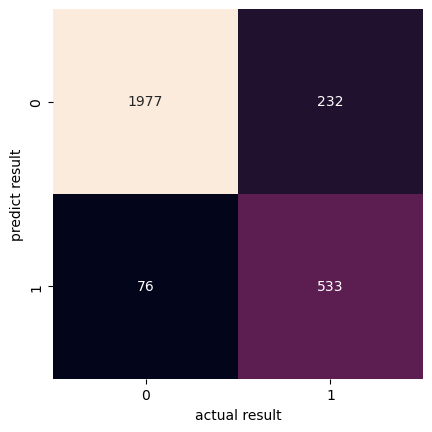

In [118]:
predictions_1 = clf.predict(X_train)
predictions_2 = clf.predict(X_test)
mat_2 = confusion_matrix(predictions_2, y_test)
sns.heatmap(mat_1, square = True, fmt = 'g', annot = True, cbar = False)
plt.xlabel('actual result')
plt.ylabel('predict result')
plt.show()

In [119]:
feature_impor = pd.DataFrame(list(zip(clf.feature_importances_, X_train)))
feature_impor.columns = ['feature importance', 'feature']
feature_impor = feature_impor.sort_values(by = 'feature importance', ascending = False)
feature_impor

,feature importance,feature
5,0.311586,Total Customer Svc Requests
37,0.138772,Contract_Month-to-Month
6,0.123111,Product/Service Issues Reported
2,0.069943,Monthly Charge
0,0.069315,Number of Referrals
39,0.048690,Contract_Two Year
3,0.035673,Total Regular Charges
4,0.030947,Total Long Distance Charges
44,0.017311,Dependents_No
38,0.016743,Contract_One Year


Y. The variable of 'Total Customer Svc Requests' is the most important to predicte the target variable.

In [120]:
total_matrix2 =sum(sum(mat_2))
accuracy = (mat_2[1,1]+mat_2[0,0])/total_matrix2
print('The model has an accuracy of',accuracy )

sensitivity = mat_2[1,1]/(mat_2[1,1]+mat_2[0,1])
print('The model has a sensitivity of', sensitivity)

specificity = mat_2[0,0]/(mat_2[0,0]+mat_2[1,0])
print('The model has a specificity of',specificity)

precision = mat_2[1,1]/ (mat_2[1,1]+mat_2[1,0])
print('The model has a precision of', precision)

bala_accuracy = (sensitivity+specificity)/2
print('The model has a balanced accuracy of',bala_accuracy)

The model has an accuracy of 0.8953158268275373
The model has a sensitivity of 0.6915032679738562
The model has a specificity of 0.9712615684364345
The model has a precision of 0.8996598639455783
The model has a balanced accuracy of 0.8313824182051454


In [121]:
pred = clf.predict(X_train)
accuracy_score(y_train,pred)

0.9060355029585799

In [122]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.8953158268275373

The difference between the accuracy values of the two datasets is not significant, which indicates a good fit.

In [123]:
input3 = pd.DataFrame([{'Number of Referrals':1, 'Avg Monthly GB Download':22, 'Monthly Charge':66,
       'Total Regular Charges':2300, 'Total Long Distance Charges':800,
       'Total Customer Svc Requests':2, 'Product/Service Issues Reported':0.5,
       'Referred a Friend_No':0, 'Referred a Friend_Yes':1, 'Offer_None':0,
       'Offer_Offer A':1, 'Offer_Offer B':0, 'Offer_Offer C':0, 'Offer_Offer D':0,
       'Offer_Offer E':0, 'Phone Service_No':1, 'Phone Service_Yes':0,
       'Multiple Lines_No':0, 'Multiple Lines_Yes':1, 'Internet Service_No':0,
       'Internet Service_Yes':1, 'Online Security_No':0, 'Online Security_Yes':1,
       'Online Backup_No':1, 'Online Backup_Yes':0, 'Device Protection Plan_No':1,
       'Device Protection Plan_Yes':0, 'Premium Tech Support_No':0,
       'Premium Tech Support_Yes':1, 'Streaming TV_No':0, 'Streaming TV_Yes':1,
       'Streaming Movies_No':1, 'Streaming Movies_Yes':0, 'Streaming Music_No':1,
       'Streaming Music_Yes':0, 'Unlimited Data_No':0, 'Unlimited Data_Yes':1,
       'Contract_Month-to-Month':0, 'Contract_One Year':1, 'Contract_Two Year':0,
       'Under 30_No':1, 'Under 30_Yes':0, 'Senior Citizen_No':1,
       'Senior Citizen_Yes':0, 'Dependents_No':1, 'Dependents_Yes':0}])    
   
clf.predict(input3)

array([0], dtype=int64)

In [125]:
clf.predict_proba(input3)

array([[0.92995354, 0.07004646]])

In [126]:
input3 = pd.DataFrame([{'Number of Referrals':10, 'Avg Monthly GB Download':70, 'Monthly Charge':100,
       'Total Regular Charges':10000, 'Total Long Distance Charges':4000,
       'Total Customer Svc Requests':10, 'Product/Service Issues Reported':1.5,
       'Referred a Friend_No':0, 'Referred a Friend_Yes':1, 'Offer_None':0,
       'Offer_Offer A':1, 'Offer_Offer B':0, 'Offer_Offer C':0, 'Offer_Offer D':0,
       'Offer_Offer E':0, 'Phone Service_No':1, 'Phone Service_Yes':0,
       'Multiple Lines_No':0, 'Multiple Lines_Yes':1, 'Internet Service_No':0,
       'Internet Service_Yes':1, 'Online Security_No':0, 'Online Security_Yes':1,
       'Online Backup_No':1, 'Online Backup_Yes':0, 'Device Protection Plan_No':1,
       'Device Protection Plan_Yes':0, 'Premium Tech Support_No':0,
       'Premium Tech Support_Yes':1, 'Streaming TV_No':0, 'Streaming TV_Yes':1,
       'Streaming Movies_No':1, 'Streaming Movies_Yes':0, 'Streaming Music_No':1,
       'Streaming Music_Yes':0, 'Unlimited Data_No':0, 'Unlimited Data_Yes':1,
       'Contract_Month-to-Month':0, 'Contract_One Year':1, 'Contract_Two Year':0,
       'Under 30_No':1, 'Under 30_Yes':0, 'Senior Citizen_No':1,
       'Senior Citizen_Yes':0, 'Dependents_No':1, 'Dependents_Yes':0}])    
   
clf.predict(input3)

array([1], dtype=int64)

CC. It is possible to determine whether a customer will continue to use the company's services by giving them characteristics such as the number of people in the household, the way they use the web service, etc. This approach allows for the greatest possible prediction of customer retention, as well as the identification of the company's target customers and market expansion directions for more targeted customer marketing and service improvement.